# <font color='black'> BDR VERSUS STOCKS </font>

## <font color='red'> What is a BDR? </font>
BRAZILIAN DEPOSITARY RECEIPT(BDR) It is a type of investment that allows Brazilian investors to expose themselves to American shares without having to expose themselves directly to the American stock market.



In [2]:
from platform import python_version
print('Version of python in this Jupyter Notebook:', python_version())

Version of python in this Jupyter Notebook: 3.11.4


In [4]:
import pandas as pd 
import yfinance as yf
import matplotlib 
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import pandas as pd
import plotly.graph_objects as go

In [6]:
nvidia = yf.download(['NVDC34.SA','NVDA'], start = '2023-01-01')['Adj Close']
nvidia.tail()

[*********************100%%**********************]  2 of 2 completed


,NVDA,NVDC34.SA
Date,,
2024-03-20,903.719971,93.989998
2024-03-21,914.349976,94.529999
2024-03-22,942.890015,98.000000
2024-03-25,950.020020,98.519997
2024-03-26,948.156311,98.320000


In [9]:
nvidia.ffill(axis = 0)

,NVDA,NVDC34.SA
Date,,
2023-01-02,NaN,15.993258
2023-01-03,143.079773,16.333115
2023-01-04,147.417679,16.513039
2023-01-05,142.580048,15.603422
2023-01-06,148.517120,16.043238
...,...,...
2024-03-20,903.719971,93.989998
2024-03-21,914.349976,94.529999
2024-03-22,942.890015,98.000000


<Axes: xlabel='Date'>

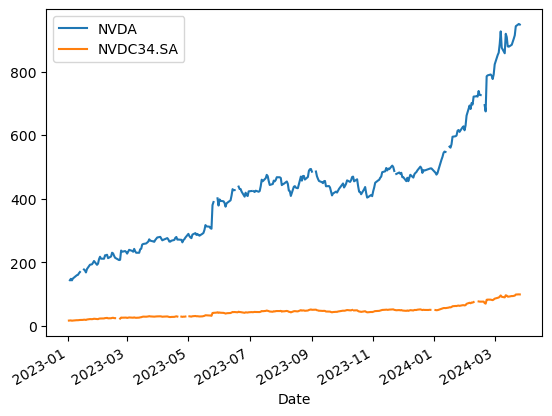

In [10]:
nvidia.plot()

In [18]:
# Creating a function for analyzing multiple time windows
def stocks(inicio):
    dados = nvidia = yf.download(['NVDC34.SA','NVDA'], start = inicio, progress = False)['Adj Close']
    dados = dados.dropna()
    dados = dados/dados.iloc[0]
    dados.plot();

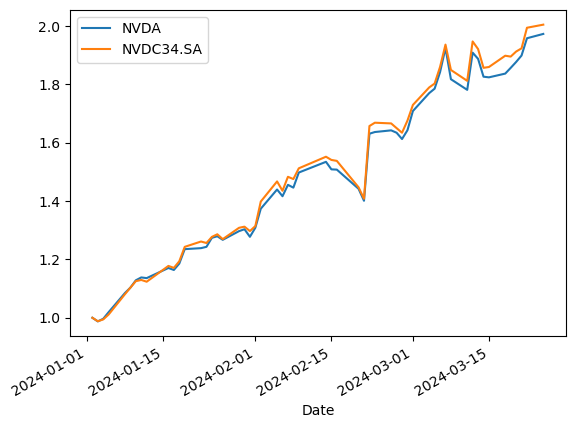

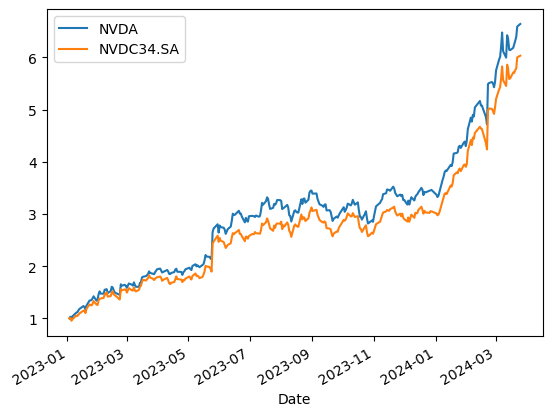

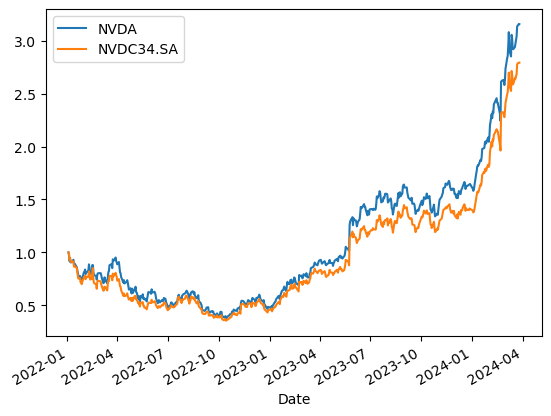

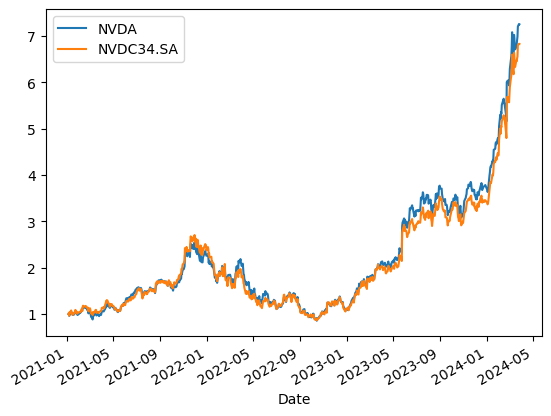

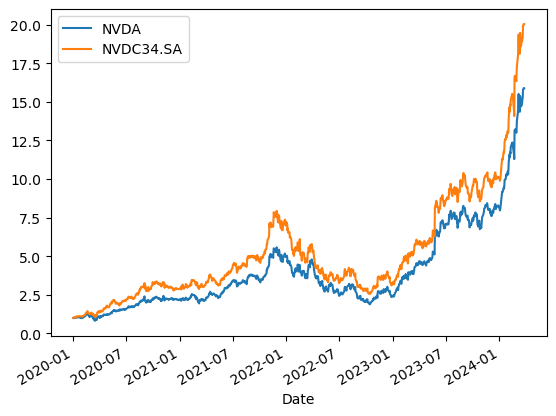

In [19]:
# Creating a function for analyzing multiple time windows
datas = ['2024-01-01', '2023-01-01', '2022-01-01', '2021-01-01','2020-01-01']

report = PdfPages('BDR_VS_STOCKS.pdf')

for data in datas:
    report.savefig(stocks(data))
report.close()

In [22]:
# calculate the exchange rate difference
data = yf.download(['NVDC34.SA','NVDA','USDBRL=X'], start = '2020-01-01')['Adj Close']
data.tail()

[*********************100%%**********************]  3 of 3 completed


,NVDA,NVDC34.SA,USDBRL=X
Date,,,
2024-03-20,903.719971,93.989998,5.0300
2024-03-21,914.349976,94.529999,4.9662
2024-03-22,942.890015,98.000000,4.9745
2024-03-25,950.020020,98.519997,5.0009
2024-03-26,949.031982,98.400002,4.9809


In [25]:
# Price in brazilian real R$ 
data['NVIDIA_R$'] = data['NVDA'] * data['USDBRL=X']
data.tail()

,NVDA,NVDC34.SA,USDBRL=X,NVIDIA_R$
Date,,,,
2024-03-20,903.719971,93.989998,5.0300,4545.711642
2024-03-21,914.349976,94.529999,4.9662,4540.844734
2024-03-22,942.890015,98.000000,4.9745,4690.406547
2024-03-25,950.020020,98.519997,5.0009,4750.954918
2024-03-26,949.031982,98.400002,4.9809,4727.033222


<Axes: xlabel='Date'>

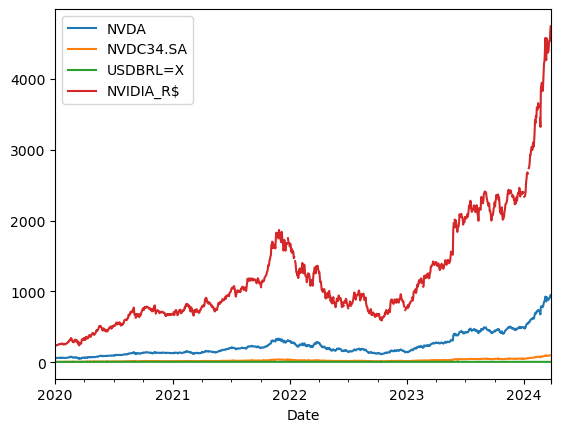

In [26]:
data.plot()

<Axes: xlabel='Date'>

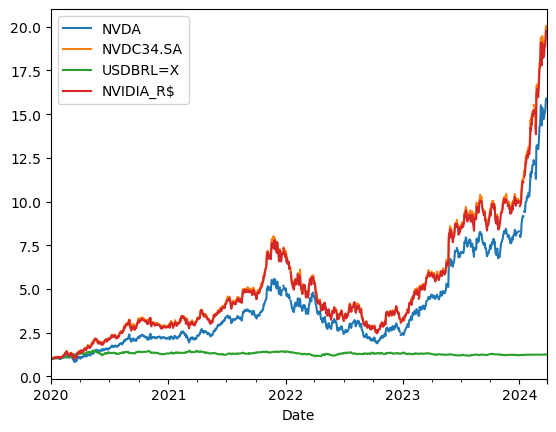

In [29]:
data_normal = data/data.iloc[1]
data_normal.plot()

In [31]:
# Ploting the difference 
fig = go.Figure()

fig.add_trace(go.Scatter(x=data_normal.index, y=data_normal['NVDA'], mode='lines', name='NVDA(U$)'))
fig.add_trace(go.Scatter(x=data_normal.index, y=data_normal['NVDC34.SA'], mode='lines', name='NVDC34'))
fig.add_trace(go.Scatter(x=data_normal.index, y=data_normal['USDBRL=X'], mode='lines', name='Dólar'))
fig.add_trace(go.Scatter(x=data_normal.index, y=data_normal['NVIDIA_R$'], mode='lines', name='NVIDIA(R$)'))

# Configurando o layout do gráfico
fig.update_layout(
    title="Comparative",
    xaxis_title="Data",
    yaxis_title="Return",
    legend_title="Ticker",
    hovermode="x",
    template="plotly_dark"
)

# Exibindo o gráfico
fig.show()

In [35]:
print(f"If you had invested in BDR: {data_normal['NVDC34.SA']}")

If you had invested in BDR: Date
2020-01-01          NaN
2020-01-02     1.000000
2020-01-03     1.006757
2020-01-06     1.017398
2020-01-07     1.042019
                ...    
2024-03-20    19.127585
2024-03-21    19.237479
2024-03-22    19.943647
2024-03-25    20.049470
2024-03-26    20.025050
Freq: B, Name: NVDC34.SA, Length: 1105, dtype: float64


In [36]:
print(f"If you had invested directly in stock: {data_normal['NVDA']}")

If you had invested directly in stock: Date
2020-01-01          NaN
2020-01-02     1.000000
2020-01-03     0.983994
2020-01-06     0.988121
2020-01-07     1.000083
                ...    
2024-03-20    15.127238
2024-03-21    15.305172
2024-03-22    15.782900
2024-03-25    15.902248
2024-03-26    15.885709
Freq: B, Name: NVDA, Length: 1105, dtype: float64
